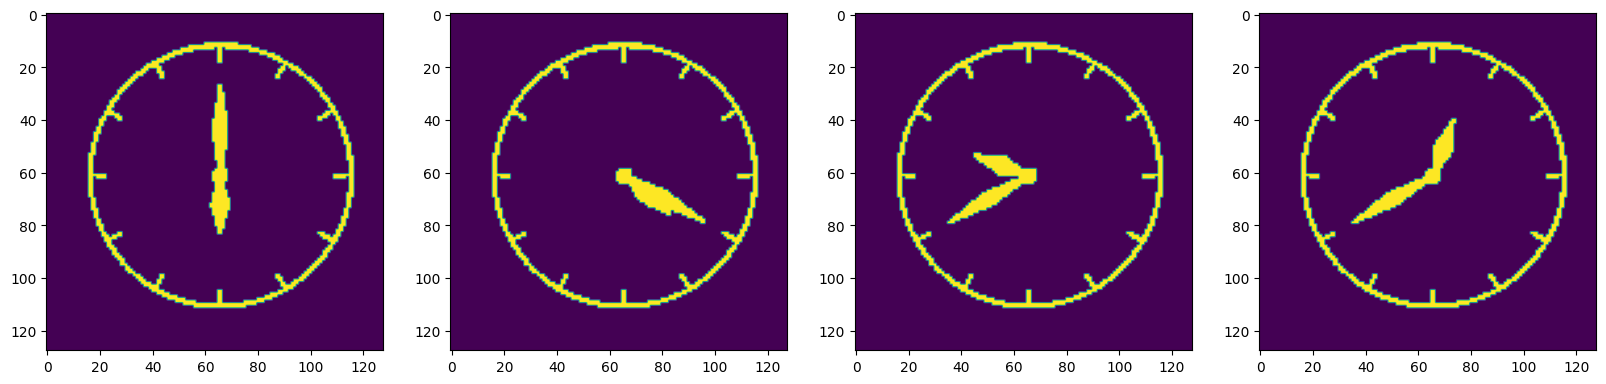

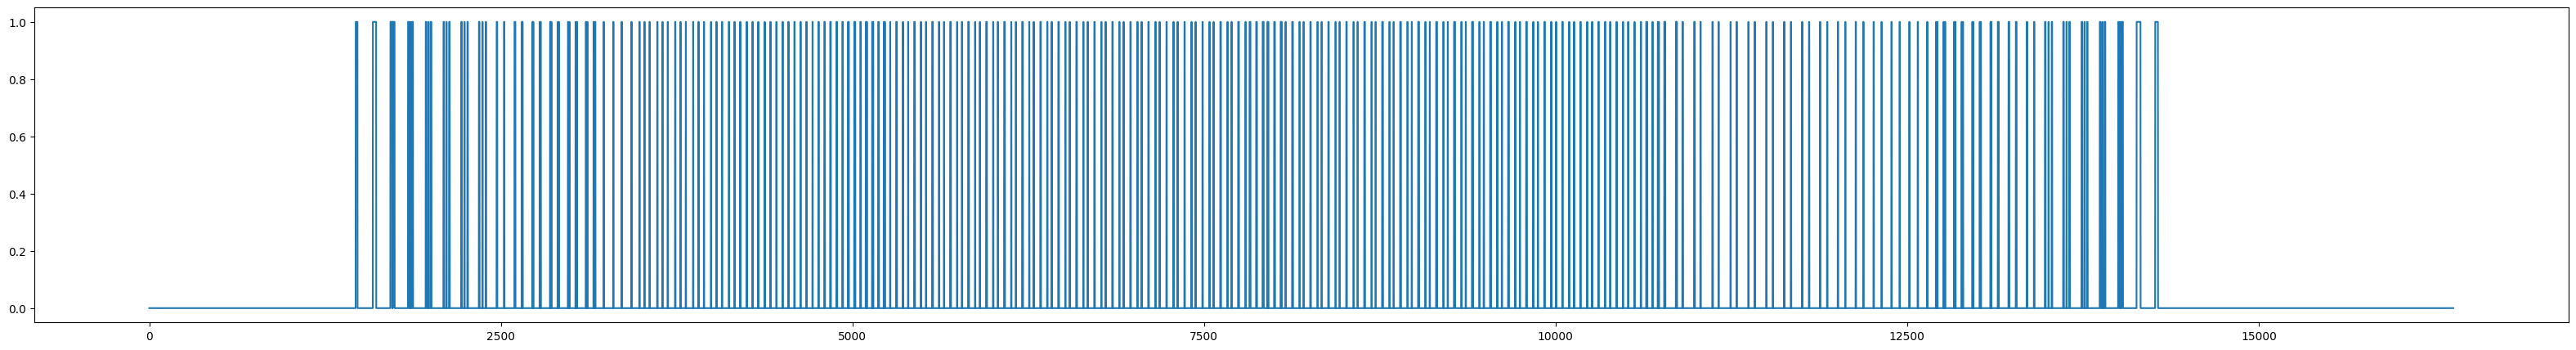

In [1]:
import numpy as np
from matplotlib import pyplot as plt

#加载CLOCK数据
data = np.load('CLOCK-128X128.npz')
x = data['data']
y = data['label']
figure = plt.figure(figsize=(20,5))
ax1 = figure.add_subplot(1, 4, 1)
ax2 = figure.add_subplot(1, 4, 2)
ax3 = figure.add_subplot(1, 4, 3)
ax4 = figure.add_subplot(1, 4, 4)
ax1.imshow(x[300,:,:])
ax2.imshow(x[200,:,:])
ax3.imshow(x[520,:,:])
ax4.imshow(x[700,:,:])
#把其中一个CLOCK数据展平并显示
figure = plt.figure(figsize=(40,5))
plt.plot(x[300,:,:].flatten())

In [2]:
x_ = np.reshape(x,(720,128*128)).astype(float)
y_ = y.astype(float)-1

#打乱数据顺序
shuffle_ix = np.random.permutation(np.arange(len(x_)))
x_ = x_[shuffle_ix]
y_ = y_[shuffle_ix]
#卡方选择特征 
from sklearn.feature_selection import VarianceThreshold
VT = VarianceThreshold()
x_VarianceThreshold = VT.fit_transform(x_)
x_VarianceThreshold.shape

(720, 3550)

In [3]:
index1 = (VT.variances_>0)

In [4]:
#互信息选择特征
from sklearn.feature_selection import mutual_info_regression as MIC
from sklearn.feature_selection import SelectKBest
mi = MIC(x_VarianceThreshold,y_)
k = mi.shape[0] - (mi<=0).sum()
x_MIC = SelectKBest(MIC, k=k).fit_transform(x_VarianceThreshold,y_)
x_MIC.shape

(720, 2083)

In [5]:
index2 = (mi>0)

In [6]:
#嵌入法选择特征
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

rfc = RFC(n_estimators = 120, random_state=0)
x_Embedding  = SelectFromModel(rfc, threshold= 0.001).fit_transform(x_MIC, y_)
print(x_Embedding.shape)
cross_val_score(rfc, x_Embedding, y_, cv=5).mean()

(720, 327)


0.951388888888889

In [7]:
temp = rfc.fit(x_MIC, y_)
index3 = (temp.feature_importances_>0.001)
index2[index2==True]=index3
index1[index1==True]=index2

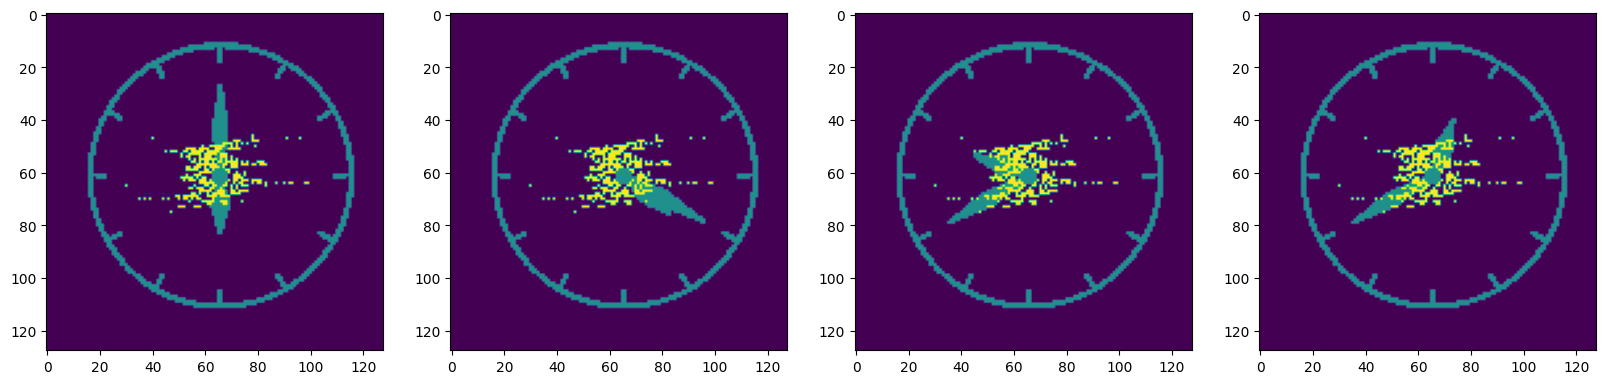

In [8]:
#最终选择特征投影到原始CLOCK上
figure = plt.figure(figsize=(20,5))
ax1 = figure.add_subplot(1, 4, 1)
ax2 = figure.add_subplot(1, 4, 2)
ax3 = figure.add_subplot(1, 4, 3)
ax4 = figure.add_subplot(1, 4, 4)
fig300 = x_[shuffle_ix==300]
fig300[:,index1] = 2.0
fig200 = x_[shuffle_ix==200]
fig200[:,index1] = 2.0
fig520 = x_[shuffle_ix==520]
fig520[:,index1] = 2.0
fig700 = x_[shuffle_ix==700]
fig700[:,index1] = 2.0
ax1.imshow(np.reshape(fig300,(128,128)))
ax2.imshow(np.reshape(fig200,(128,128)))
ax3.imshow(np.reshape(fig520,(128,128)))
ax4.imshow(np.reshape(fig700,(128,128)))